**[ 목차 ]**

1. CNN_basic

2. CNN_MNIST

3. CNN_MNIST_layer를 깊게

4. CNN_개인 데이터셋

5. CNN_VGG

6. CNN_ResNet

7. CNN_기타


# CNN(convolution Neural Network)_basic

CNN은 이미지를 인식하기 위해 패턴을 찾는데 유용하다.

* CNN 이전

CNN이 나오기 이전에 이미지는 2차원으로 된 이미지를 1차원배열로 바꾼 뒤 Fully Connected 로 학습시켰다. 하지만 이미지 형상이 고려되지 않는 점, 많은 양의 학습데이터 필요, 학습시간이 긴 점, 이미지의 회전 및 움직임을 고려할 수 없는 점 등의 단점이 있다. 즉, 이미지 데이터를 평면화 시키는 과정에서 공간정보가 손실되기 때문에 '이미지 공간정보를 유지한채 학습'하는 CNN 모델이 등장하였다.

* CNN
    - stride : 값을 조정하면서 filter를 옮겨 이미지의 특징을 추출할 수 있다.
    - filter : 여러 개의 필터를 이용해 이미지의 세부 특징을 추출해 학습할 수 있다.
    - channel : 보통 연산량을 줄이기 위해(오차감소) 전처리에서 이미지를 흑백으로 만들어 처리한다.
    
    (흑백)
    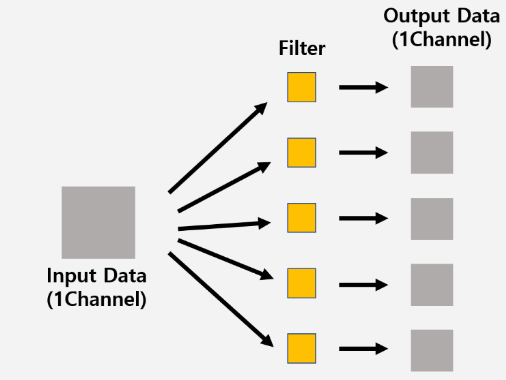
    
    (컬러) = Multi Channel
    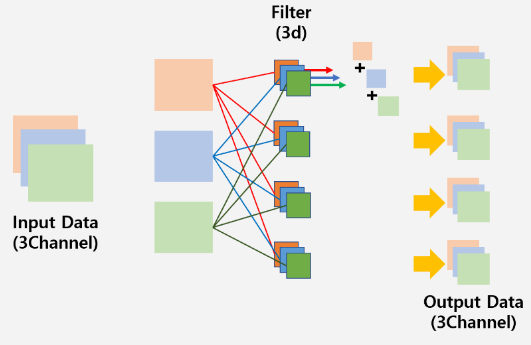
    
    이 때, input data의 channel 수와 filter의 channel수가 같아야 한다.


## convolution

이미지 위에서 stride 값 만큼 filter(kernel)을 이동시키면서 겹쳐지는 부분의 각 원소의 값을 곱해서 모두 더한값을 출력하는 연산

## stride and padding

- stride : filter를 몇 칸 이동할 것인가

    연산을 하면 output size가 input size보다 작아지는데, 이를 막기 위해 padding을 사용한다.
    
    
    
- padding : zero-padding( 0으로 둘러싸는 padding, 특징이나 분해능에 영향 x )
    
    valid : padding이 없으므로 입력보다 출력의 크기가 작아진다.
    
    same : padding이 있으므로 입력과 출력의 크기가 같다.



- input
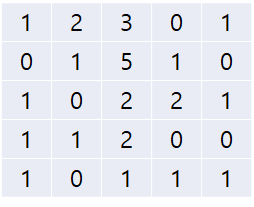


- filter size =  3 x 3
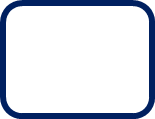


- input, stride = 2
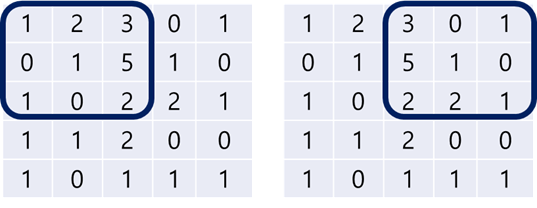



- input, padding = 1
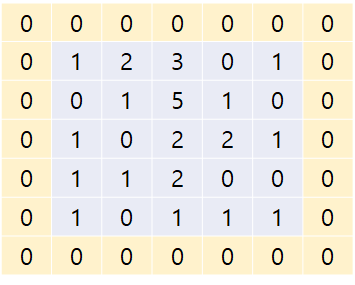

## Pytorch nn.Conv2d

* 함수 사용
torch.nn.Conv2d(in_channels, out_channels, kernal_size, stride=1, padding=0, dilation=1, groups=1, bias=True)


* 입력 형태
    - input type : torch.Tensor
    - input shape : (N X H X W X C) = (batch_size, height, width, channel)


* 출력 형태
   $$ output size = \frac {input size - filter size + 2 * padding}{stride} + 1 $$

In [2]:
import torch
import torch.nn as nn

### 예제1

In [3]:
# filter 생성
conv = nn.Conv2d(1, 1, 11, stride=4, padding=0)

# input
inputs = torch.Tensor(1, 1, 227, 227)

# output
out = conv(inputs)
out.shape 
# ( 227 - 11 ) / 4 + 1 = 55

torch.Size([1, 1, 55, 55])

### 예제 2 
계산값이 소수점인 경우, 절삭한다

In [6]:
# filter 생성
conv = nn.Conv2d(1, 1, 7, stride=2, padding=0)

# input
inputs = torch.Tensor(1, 1, 64, 64)

# output
out = conv(inputs)
out.shape 
# ( 64 - 7) / 2 + 1 = 29

torch.Size([1, 1, 29, 29])

### 예제 3
padding값이 있는 경우

In [7]:
# filter 생성
conv = nn.Conv2d(1, 1, 5, stride=1, padding=2)

# input
inputs = torch.Tensor(1, 1, 32, 32)

# output
out = conv(inputs)
out.shape
# (32 - 5 + 2*2) / 1 +1 = 32

torch.Size([1, 1, 32, 32])

### 예제 4
input image size의 크기가 다른 경우

In [9]:
# filter 생성
conv = nn.Conv2d(1, 1, 5, stride=1, padding=0)

# input
inputs = torch.Tensor(1, 1, 32, 64)

# output
out = conv(inputs)
out.shape

# (32 - 5) / 1 + 1 = 28
# (64 - 5) / 1 + 1 = 59

torch.Size([1, 1, 28, 60])

### 예제 5
input image size의 크기가 다르고 padding값이 있는 경우

In [10]:
# filter 생성
conv = nn.Conv2d(1, 1, 3, stride=1, padding=1)

# input
inputs = torch.Tensor(1, 1, 64, 32)

# output
out = conv(inputs)
out.shape

# (64 - 3 + 2*1) / 1 + 1 = 64
# (32 - 3 + 2*1) / 1 + 1 =32

torch.Size([1, 1, 64, 32])

## Neuron과 Convolution

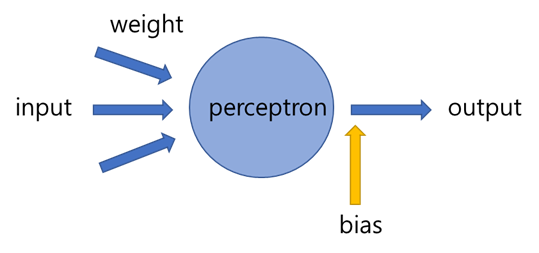


## pooling

* 사용하는 이유
    * 이미지의 사이즈를 줄이기 위해서
    * fully conected 연산을 대체하기 위해서 average pooling 사용
    * 적당히 크기를 줄이고, 특정 feature를 강조하자.
    
    => 행렬의 크기는 감소하고, 채널 수의 변경은 없다


* max pooling : filter 안에서 가장 큰 값

    뉴런이 가장 큰 신호에 반응하는 것과 유사함.

    노이즈 감소, 속도 빠르고, 영상의 분별력 향상 효과

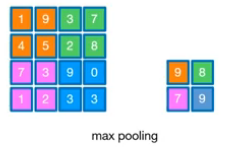



* average pooling : filter shpae의 평균값 사용
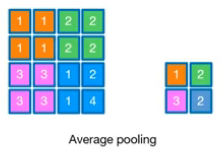

### MaxPool2d

torch.nn.MaxPool2d(kernel_size, strid=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

In [11]:
# filter 생성
conv = nn.Conv2d(1, 5, 5)

# input
inputs = torch.Tensor(1, 1, 28, 28)

# pool 
pool = nn.MaxPool2d(2)

# output
out = conv(inputs)
print('before pooling size : ', out.shape)

out2 = pool(out)
print('after pooling size : ',out2.shape)

before pooling size :  torch.Size([1, 5, 24, 24])
after pooling size :  torch.Size([1, 5, 12, 12])


## Cross-Correlation VS Convolution

# CNN_MNIST

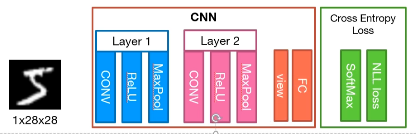

이미지 데이터를 넣어 어떤 숫자인지 예측하자

In [11]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import torchvision

# GPU 사용 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
torch.cuda.is_available()

False

## size 변화 알아보기

In [17]:
# input
# tensor 생성
inputs = torch.Tensor(1, 1, 28, 28) # (batch_size, channel, height, width)

# 첫번째 layer
conv = nn.Conv2d(1, 32, 3, stride=1, padding=1) # (in_channels, out_channels, kernal_size, stride=1, padding=0)
pool = nn.MaxPool2d(kernel_size = 2, stride=2)

# 두번째 layer
conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)



# layer1
out = conv(inputs)
print(out.shape)
out = pool(out)
print(out.shape)

# layer2
out = conv2(out)
print(out.shape)
out = pool(out)
print(out.shape)

# view
out = out.view(out.size(0), -1)
print(out.shape) # 여기에서의 shape[1] 값이 fc의 input값이 된다.

# fc
fc = nn.Linear(3136, 10) # input : 2^6 * 7^2, output :10
out = fc(out)
print(out.shape)

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])
torch.Size([1, 3136])
torch.Size([1, 10])


## DATA

In [53]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(), # input -> tensor 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [54]:
# 데이터가 60000개이므로 batch_size를 설정하자
batch_size = 1000

# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

## 모델 설정

In [55]:
class CNN(torch.nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__() 
        
        
        # layer1
        # L1 ImgIn shape=(?, 28, 28, 1) # NHWC ( batch_size, height, width, channel )
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # layer2
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # view결과 : 7 * 7 * 64 이 된다.
        self.fc = nn.Linear(7*7*64, 10, bias=True) # input, output 
        # 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)
        
    
    def forward(self, x) :
        # layer를 쌓는다.
        out = self.layer1(x)
        out = self.layer2(out)
        
        # view로 펼쳐주고
        out = out.view(out.size(0), -1)
        # fully connected 수행
        out = self.fc(out)
        return out
    
model = CNN().to(device)

### torch.nn.init.xavier_uniform_(self.fc.weight)

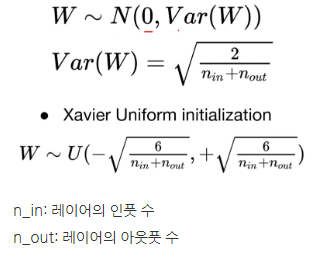

출력값이 0과 1에 치우치면 gradient는 0에 가까운 값을 갖게 되고, 이는 gradient vanishing 현상의 원인이 된다. 따라서 activation funciton과 가중치 초기화로 이를 해소할 수 있다.

gradient vanishing 현상을 완화하기 위해서 가중치를 초기화할 때 sigmoid와 같은 s자 함수는 출력값들이 표준 정규 분포 형태를 갖게 하는 것이 가장 중요하다. (안정적으로 학습 가능)

따라서, 단순히 작은 값의 표준편차를 갖는 형태로 초기화하는 것이 아닌 발전된 방법인 Xavier 초기화 방법을 사용한다.

Xavier 초기화 방법 = 표준 정규분포 / 입력 개수의 표준편차

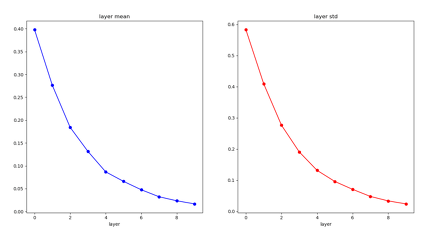
하지만 Xavier 초기화 방법과 ReLU 함수를 결합했을 때는 출력값이 0으로 수렴하고 평균과 표준편차 모두 0으로 수렴한다. 따라서, ReLU 함수를 사용할 경우에는 Xavier 초기화 방법을 사용할 수 없다.


그렇다면 ReLU에는 어떤 초기화 방법이 사용될까 ?
=> He Initialization

xavier와 크게 다르지 않다.

He 초기화 방법 = 표준 정규분포 / sqrt(입력 개수/2)

## train

In [56]:
learning_rate = 0.001
training_epochs = 20

criterion = nn.CrossEntropyLoss().to(device) # loss 계산
optimizer = torch.optim.Adam(model.parameters(), # gradient update # gradient, learning rate 고려하여 어디로 갈 것인지
                             lr=learning_rate)

In [57]:
# training
total_batch = len(data_loader)

for epoch in range(training_epochs) :
    avg_cost = 0
    
    for X, Y in data_loader :

        X = X.to(device)  # tensor로 변환된 채 input
        Y = Y.to(device)
        
        optimizer.zero_grad() # gradient 초기화
        hypothesis = model(X) 
        
        cost = criterion(hypothesis, Y)
        cost.backward() # back propagation을 통해 각 변수마다 loss에 대한 gradient 를 구해주기
        optimizer.step() # 지정한 model의 parameter update
        
        avg_cost += cost / total_batch
        
    print('[Epoch : {}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!')

[Epoch : 1] cost = 0.7896559834480286
[Epoch : 2] cost = 0.207426980137825
[Epoch : 3] cost = 0.12249553948640823
[Epoch : 4] cost = 0.08785971999168396
[Epoch : 5] cost = 0.07051084190607071
[Epoch : 6] cost = 0.061350513249635696
[Epoch : 7] cost = 0.05389232560992241
[Epoch : 8] cost = 0.04846632480621338
[Epoch : 9] cost = 0.04515983536839485
[Epoch : 10] cost = 0.04125050827860832
[Epoch : 11] cost = 0.03881020098924637
[Epoch : 12] cost = 0.03721907362341881
[Epoch : 13] cost = 0.035072483122348785
[Epoch : 14] cost = 0.033093903213739395
[Epoch : 15] cost = 0.030613411217927933
[Epoch : 16] cost = 0.02878909930586815
[Epoch : 17] cost = 0.028197208419442177
[Epoch : 18] cost = 0.025976231321692467
[Epoch : 19] cost = 0.02568356692790985
[Epoch : 20] cost = 0.02352556586265564
Learning Finished!


In [58]:
with torch.no_grad() :
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

Accuracy :  0.9786999821662903


## 데이터와 예측값

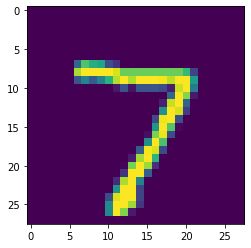

predict number :  7


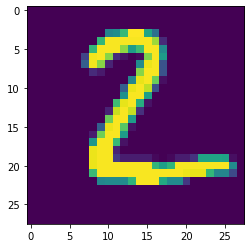

predict number :  2


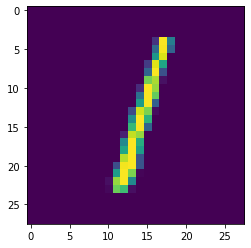

predict number :  1


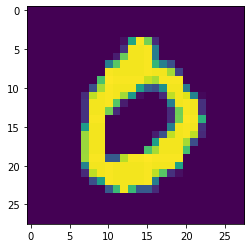

predict number :  0


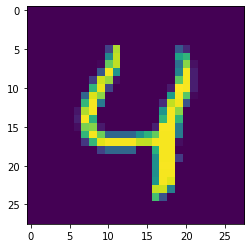

predict number :  4


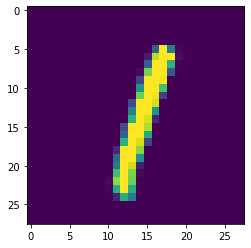

predict number :  1


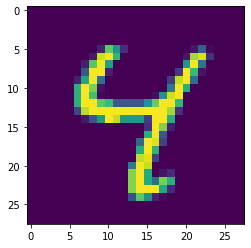

predict number :  4


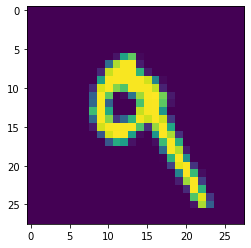

predict number :  9


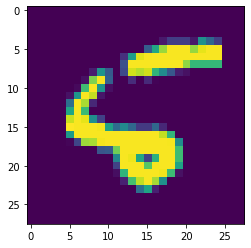

predict number :  5


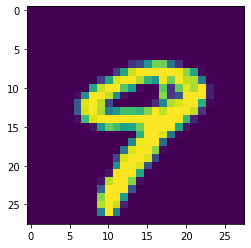

predict number :  9


In [81]:
import matplotlib.pyplot as plt

for idx in range(10) :
    plt.imshow(torch.squeeze(X_test[idx]))
    plt.show()
    print('predict number : ', torch.argmax(prediction, 1)[idx].item())

### torch.optim.Adam().zero_grad()

### torch.nn.CrossEntropyLoss

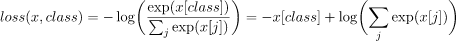

주로 다중 분류에 사용되며, nn.LogSoftmax와 nn.NLLLoss의 연산의 조합이다.

* nn.LogSoftmax는 신경망 말단의 결과 값들을 확률 개념으로 해석하기 위한 softmax 함수의 결과에 log값을 취한 연산


* nn.NLLLoss는 nn.LogSoftmax의 log 결과값에 대한 교차 엔트로피 손실연산(cross entropy loss)이다.

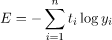

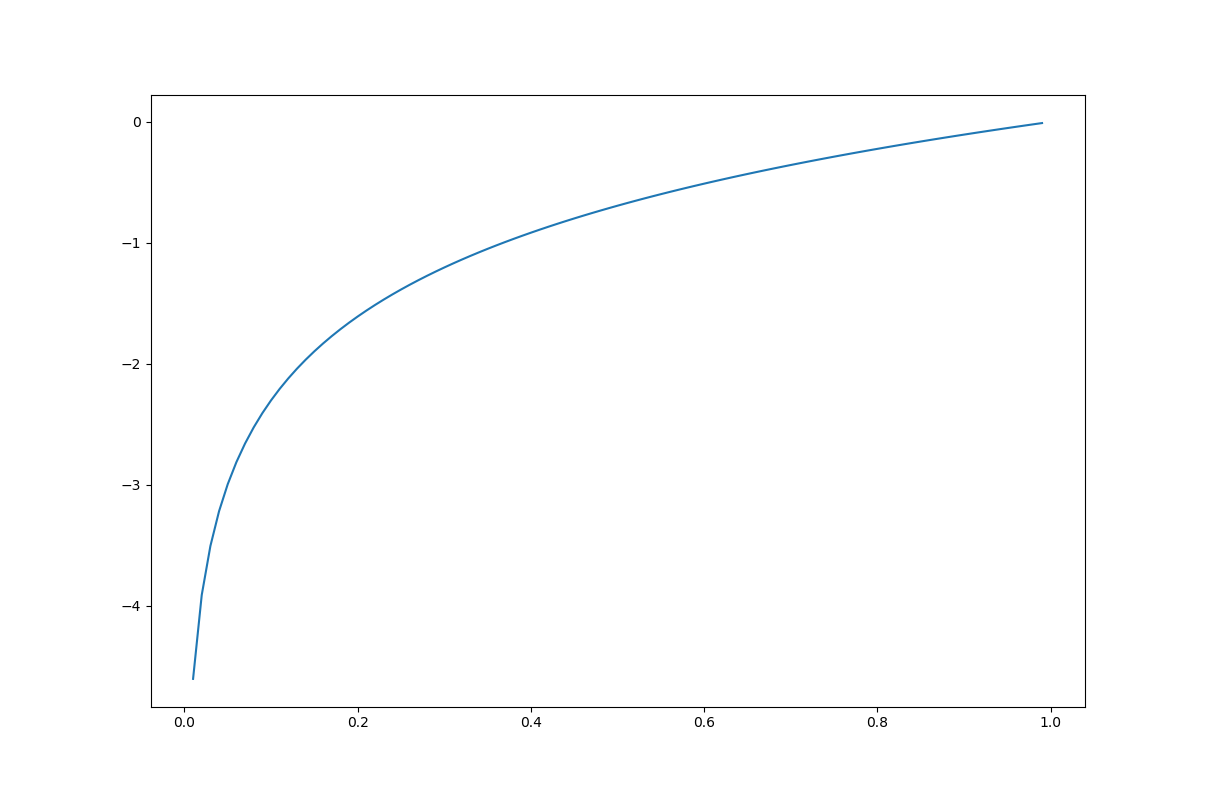

가로축은 정답일 확률, y축은 손실값 * -1 이다. 정답일 확률이 낮아질수록 손실값은 무한대로 커지게 된다.

# CNN_MNIST_deep layer

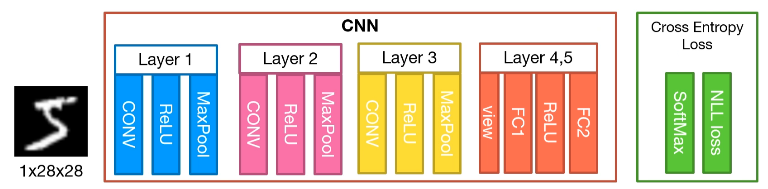

## 모델 설정

In [82]:
class CNN(torch.nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__() 
        # 일부 요소만 학습하도록 한다
        self.keep_prob = 0.5
        
        # layer1
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)        
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        # layer2
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        # layer3
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2, padding=1))
        
        
        # L4 FC 4x4x128 inputs -> 625 outputs
        # 왜 625인지 ?????????? 
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
        
    
    def forward(self, x) :
        # layer를 쌓는다.
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        # view
        out = out.view(out.size(0), -1)
        
        # fc
        out = self.layer4(out)
        out = self.fc2(out)

        return out
    
model = CNN().to(device)

### self.keep_prob

일부 요소만 학습하도록 두고, 실제 측정할 때는 1

### layer 쌓은 뒤에 왜 fc 두 번 하는지 ?

## train

In [83]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')

for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 0.636317432
[Epoch:    2] cost = 0.108071573
[Epoch:    3] cost = 0.0695833266
[Epoch:    4] cost = 0.0556961186
[Epoch:    5] cost = 0.043512132
[Epoch:    6] cost = 0.0361667052
[Epoch:    7] cost = 0.0329161435
[Epoch:    8] cost = 0.027553061
[Epoch:    9] cost = 0.0248502046
[Epoch:   10] cost = 0.0230989102
[Epoch:   11] cost = 0.0196910501
[Epoch:   12] cost = 0.0195036437
[Epoch:   13] cost = 0.0166591983
[Epoch:   14] cost = 0.0148723256
[Epoch:   15] cost = 0.0123064118
[Epoch:   16] cost = 0.0108702816
[Epoch:   17] cost = 0.0120006725
[Epoch:   18] cost = 0.0105860988
[Epoch:   19] cost = 0.0102192359
[Epoch:   20] cost = 0.00804606825
Learning Finished!


In [84]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9921000003814697


## 데이터와 예측값

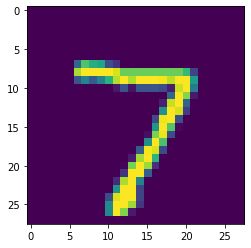

predict number :  7


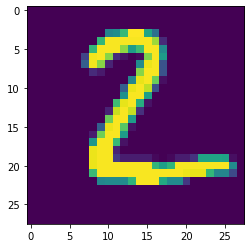

predict number :  2


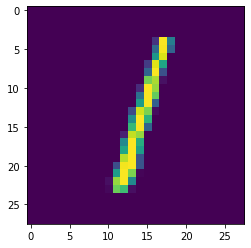

predict number :  1


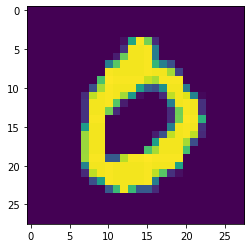

predict number :  0


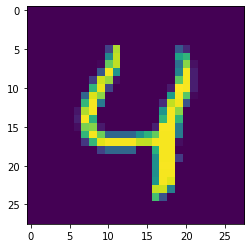

predict number :  4


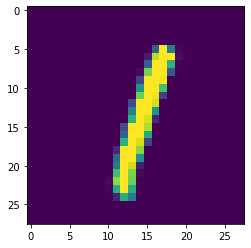

predict number :  1


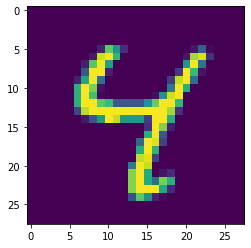

predict number :  4


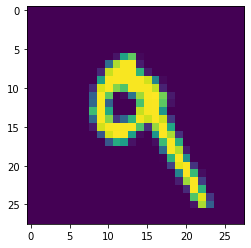

predict number :  9


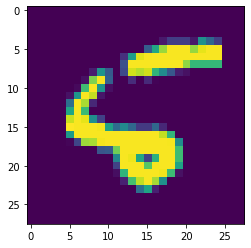

predict number :  5


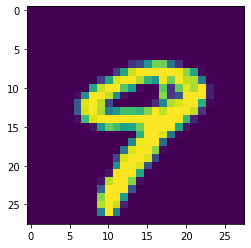

predict number :  9


In [85]:
import matplotlib.pyplot as plt

for idx in range(10) :
    plt.imshow(torch.squeeze(X_test[idx]))
    plt.show()
    print('predict number : ', torch.argmax(prediction, 1)[idx].item())

## visdom을 이용하여 loss변화를 그려보자

In [ ]:
# 세션 연결
import visdom
vis = visdom.Visdom()

# define loss_tracker
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win = loss_plot,
             update='append'
             )
    
# 그려주기
loss_plt = vis.line(Y=torch.Tensor(1).zero_(),
                    opts=dict(title='loss_tracker', 
                              legend=['loss'], 
                              showlegend=True))


for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))
    loss_tracker(loss_plt, torch.Tensor([avg_cost]), torch.Tensor([epoch]))
print('Learning Finished!')

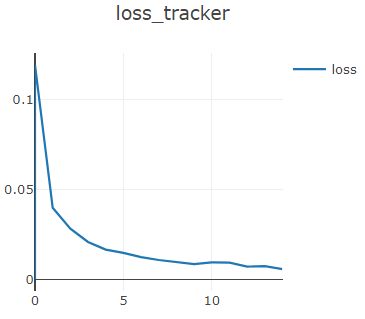

# CNN_개인dataset

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

from matplotlib.pyplot import imshow
%matplotlib inline

## Data

In [86]:
trans = transforms.Compose([
    transforms.Resize((64, 128))
])

train_data = torchvision.datasets.ImageFolder(root = "./custom_data/origin_data",
                                           transform=trans)

In [87]:
# 한 곳에 있는 데이터를 분리해준다

for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if(label == 0):
        data.save('custom_data/train_data/gray/%d_%d.jpeg'%(num, label))
    
    else:
        data.save('custom_data/train_data/red/%d_%d.jpeg'%(num, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD60E6A0> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A17C0> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5AB700> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A3A30430> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AC1D1340> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD60E6A0> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5AB700> 0
15 <P

126 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
127 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
128 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A3A30430> 0
129 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD60E6A0> 0
130 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AC1D1340> 0
131 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A3A30430> 0
132 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
133 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 0
134 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 0
135 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
136 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AC1D1340> 0
137 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
138 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 0
139 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD60E6A0> 0
140 <PIL.Image.Image image mode=RGB size=128x64 

255 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A3A30430> 0
256 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AC1D1340> 0
257 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A3A30430> 0
258 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
259 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
260 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5AB700> 0
261 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
262 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 0
263 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
264 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 0
265 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1640> 0
266 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 0
267 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5AB700> 0
268 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 0
269 <PIL.Image.Image image mode=RGB size=128x64 

385 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 1
386 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5AB700> 1
387 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 1
388 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 1
389 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD60E6A0> 1
390 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AC1D1340> 1
391 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 1
392 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD60E6A0> 1
393 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5AB700> 1
394 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 1
395 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5ABAF0> 1
396 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5AD5A1730> 1
397 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6998B20> 1
398 <PIL.Image.Image image mode=RGB size=128x64 at 0x2A5A6977070> 1
399 <PIL.Image.Image image mode=RGB size=128x64 

In [88]:
# tensor로 변환
trans = transforms.Compose([transforms.ToTensor() ])


train_data = torchvision.datasets.ImageFolder(root='./custom_data/train_data',
                                             transform=trans)

data_loader = DataLoader(dataset = train_data, 
                        batch_size = 8,
                        shuffle = True,
                        num_workers=2)

## 모델 설정

In [99]:
class CNN(nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__()
        
        # layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, 5), # 입력 3, 출력 6, 필터 5 # padding=0
            nn.ReLU(),
            nn.MaxPool2d(2), # filter = 2, stride = 2, padding=0
        )
        
        # layer2
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, 5), # 입력 6, 출력 16, 필터 5
            nn.ReLU(),
            nn.MaxPool2d(2),
        
        )
        
        # FC
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120), #  출력 120
            nn.ReLU(),
            nn.Linear(120, 2) # 입력 120, 출력2
        )
        
        
    def forward(self, x) :
        
        # print(x.shape) 
        # torch.Size([8, 3, 64, 128]) # batch_size, channel, height, width
        
        out = self.layer1(x)
        # print(out.shape)
        # torch.Size([8, 6, 30, 62])
        
        out = self.layer2(out)
        # print(out.shape)
        # torch.Size([8, 16, 13, 29])
        
        # view
        out = out.view(out.shape[0], -1) # 8, 6032
        # print(out.shape)
        # torch.Size([8, 6032])
        
        
        # fc
        out = self.layer3(out) 
        # print(out.shape)
        # torch.Size([8, 2])
        return out

# testing
net = CNN().to(device)

## train

In [100]:
test_input = (torch.Tensor(3, 3, 64, 128)).to(device)
test_out = net(test_input)

optimizer = optim.Adam(net.parameters(), lr=0.00001)
loss_func = nn.CrossEntropyLoss().to(device)

In [104]:
total_batch = len(data_loader)

epochs = 450

for epoch in range(epochs) :
    avg_cost = 0.0
    for num, data in enumerate(data_loader) :
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
    
print('Learning Finished!')

[Epoch:1] cost = 0.06489171087741852
[Epoch:2] cost = 0.04548311233520508
[Epoch:3] cost = 0.03536192700266838
[Epoch:4] cost = 0.027805333957076073
[Epoch:5] cost = 0.0226804967969656
[Epoch:6] cost = 0.01874379813671112
[Epoch:7] cost = 0.015824371948838234
[Epoch:8] cost = 0.01316926907747984
[Epoch:9] cost = 0.01126211229711771
[Epoch:10] cost = 0.009981885552406311
[Epoch:11] cost = 0.008694374933838844
[Epoch:12] cost = 0.007585640996694565
[Epoch:13] cost = 0.006839704234153032
[Epoch:14] cost = 0.006079962942749262
[Epoch:15] cost = 0.0055122412741184235
[Epoch:16] cost = 0.00498164352029562
[Epoch:17] cost = 0.004541895817965269
[Epoch:18] cost = 0.0040845624171197414
[Epoch:19] cost = 0.003751483280211687
[Epoch:20] cost = 0.003455279627814889
[Epoch:21] cost = 0.003178881946951151
[Epoch:22] cost = 0.002932820236310363
[Epoch:23] cost = 0.002689623972401023
[Epoch:24] cost = 0.002453739056363702
[Epoch:25] cost = 0.0022936391178518534
[Epoch:26] cost = 0.0021173888817429543


[Epoch:204] cost = 7.496799980799551e-07
[Epoch:205] cost = 7.129987693588191e-07
[Epoch:206] cost = 6.943960784155934e-07
[Epoch:207] cost = 6.664446345894248e-07
[Epoch:208] cost = 6.330021733447211e-07
[Epoch:209] cost = 6.118388569120725e-07
[Epoch:210] cost = 5.944077656749869e-07
[Epoch:211] cost = 5.653773769154213e-07
[Epoch:212] cost = 5.476689466377138e-07
[Epoch:213] cost = 5.290346507536015e-07
[Epoch:214] cost = 5.021946094529994e-07
[Epoch:215] cost = 4.887432965006155e-07
[Epoch:216] cost = 4.705414653471962e-07
[Epoch:217] cost = 4.5557877115243173e-07
[Epoch:218] cost = 4.3861047061000136e-07
[Epoch:219] cost = 4.192978906303324e-07
[Epoch:220] cost = 4.0199034856414073e-07
[Epoch:221] cost = 3.8616371966782026e-07
[Epoch:222] cost = 3.7345330383686814e-07
[Epoch:223] cost = 3.617297181790491e-07
[Epoch:224] cost = 3.464586484369647e-07
[Epoch:225] cost = 3.3427224366278097e-07
[Epoch:226] cost = 3.2224039614447975e-07
[Epoch:227] cost = 3.101776542280277e-07
[Epoch:22

[Epoch:402] cost = 6.478765302020406e-10
[Epoch:403] cost = 4.3191769605321895e-10
[Epoch:404] cost = 0.0
[Epoch:405] cost = 0.0
[Epoch:406] cost = 2.1595884802660947e-10
[Epoch:407] cost = 0.0
[Epoch:408] cost = 2.1595884802660947e-10
[Epoch:409] cost = 0.0
[Epoch:410] cost = 0.0
[Epoch:411] cost = 0.0
[Epoch:412] cost = 2.1595884802660947e-10
[Epoch:413] cost = 0.0
[Epoch:414] cost = 0.0
[Epoch:415] cost = 0.0
[Epoch:416] cost = 0.0
[Epoch:417] cost = 0.0
[Epoch:418] cost = 0.0
[Epoch:419] cost = 0.0
[Epoch:420] cost = 0.0
[Epoch:421] cost = 0.0
[Epoch:422] cost = 0.0
[Epoch:423] cost = 0.0
[Epoch:424] cost = 0.0
[Epoch:425] cost = 0.0
[Epoch:426] cost = 0.0
[Epoch:427] cost = 0.0
[Epoch:428] cost = 0.0
[Epoch:429] cost = 0.0
[Epoch:430] cost = 0.0
[Epoch:431] cost = 0.0
[Epoch:432] cost = 0.0
[Epoch:433] cost = 0.0
[Epoch:434] cost = 0.0
[Epoch:435] cost = 0.0
[Epoch:436] cost = 0.0
[Epoch:437] cost = 0.0
[Epoch:438] cost = 0.0
[Epoch:439] cost = 0.0
[Epoch:440] cost = 0.0
[Epoch:44

### 학습한 것 저장해두기

In [105]:
torch.save(net.state_dict(), './model/model.pth')

new_net = CNN().to(device)
new_net.load_state_dict(torch.load('./model/model.pth'))

<All keys matched successfully>

## predict

In [106]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='./custom_data/test_data', transform=trans)

In [107]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [108]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 1.0


# Advanced CNN_VGG

* VGG의 특징

    - AlexNet(2012)의 오차율을 절반으로 줄인 모델

    - 16, 19와 같은 layer가 깊은 신경망 모델

    - 3 x 3 filter만 사용


* 3 x 3 의 filter만 사용하여 layer가 깊은 신경망은 어떤 점이 좋을까 ?

    EX ) 10 x 10 의 input을 7 x 7, 3 x 3 의 filter로 convolution 해보자.
    
        1 ) 7 x 7 filter 사용한 결과 : 4 x 4
        
        2 ) 3 x 3 filter 사용한 결과 : 8 x 8 => 6 x 6 => 4 x 4


    같은 크기가 되기 까지
    
    1)의 경우는 7x7=49의 연산, 
    
    2)의 경우는 3x3x3=27의 연산을 하므로
    
    2)의 경우에 훈련 개수가 작아 학습속도가 빨라지게 된다. 
    동시에 층의 갯수가 증가하면서 비선형성이 증가하여 특징의 식별성이 높아진다.

        - 층의 갯수가 증가하면 왜 비선형성이 증가하는가 ?
        - 비선형성이 증가하면 왜 특징의 식별성이 높아지는지 ?

------------
------------


* VGG16 구성
    - 13 Convolution layers + 3 Fully Connected layers
    - 3 x 3 filters
    - stride = 1, padding = 1
    - 2 x 2 max pooling, stride = 2
    - ReLU 활성화 함수 사용
    
    
* 코드에서 **conv3_64**은 3 x 3 필터가 64개 있음을 의미한다.


* 3 FC 는 각각 4096, 4096, 1000 개의 유닛으로 구성된다.

    - 출력층은 classification을 위해 softmax 함수를 사용한다.
    
    
* VGG 구조
    - A, A-LRN, B, C, D, E
    - A와 A-LRN의 차이점은 Normalization이다.
      비교 결과 큰 성능차이를 보이지 않아서 이후 구조에서 적용하지 않음


* 여기에 더하여 Batch Normalizaion이 포함된 버전이 주로 활용된다.

### Batch Normalization의 역할

신경망이 깊어지면 가중치들의 작은 변화가 큰 변화로 이어지는 현상이 발생한다. 이를 해결하기 위해 '초기화' 방법으로 가중치를 잘 설정하였다. 다른 방법으로 출력값 자체를 정규화 해주면 어떨까 ? 

이 방법을 Batch Normalization 이라고 한다.

각 층의 출력값 자체를 안정화하는 방법

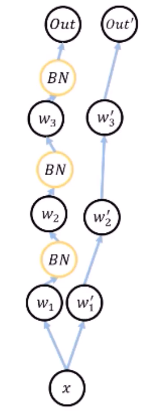

* 장점

1 ) 기존 Deep Network에서는 learning rate를 너무 높게 잡을 경우 gradient가 explode/vanish 하거나, 나쁜 local minima에 빠지는 문제가 있다. propagation할 때 parameter의 scale에 영향을 받지 않게 된다.

2 ) 자체적인 regularization 효과. weight regularization 등을 제외할 수 있게 하고, 나아가 dropout을 제외할 수 있게한다.

droptout의 효과와 batch normalization의 효과가 같음. dropout은 효과는 좋지만 학습 속도가 다소 느려지는데 batch normalization은 이를 제거하여 학습 속도가 향상된다.

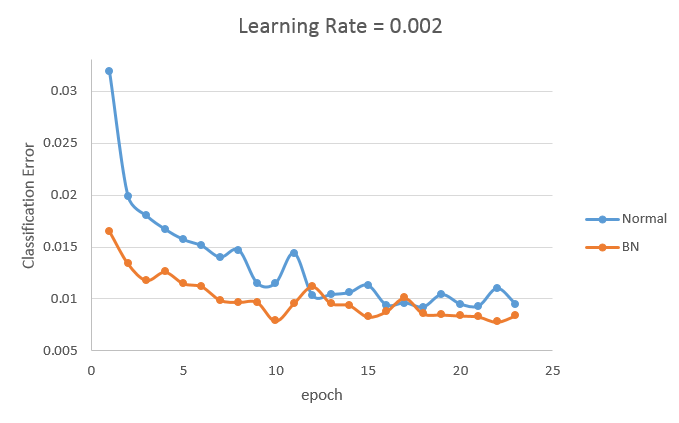

## VGG16_basic

In [1]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

### VGG 다운로드

In [2]:
__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]


model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

### 모델 설정

In [3]:
class VGG(nn.Module):
    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        
        self.features = features #convolution layer
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, num_classes),
        )#Fully Connected layer
        
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x) # Convolution 
        x = self.avgpool(x) # avgpool
        x = x.view(x.size(0), -1) #
        x = self.classifier(x) #FC layer
        return x

    def _initialize_weights(self):
        for m in self.modules():
            
            if isinstance(m, nn.Conv2d):
                # kaiming_normalizaion : 어떤 
                nn.init.kaiming_normal_(m.weight, 
                                        mode='fan_out', 
                                        nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
                    
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [4]:
# 'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']


def make_layers(cfg, batch_norm=False):
    layers = [] 
    in_channels = 3
    
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, 
                           nn.BatchNorm2d(v), 
                           nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v # output을 다음의 input으로 맞춰준다
                     
    return nn.Sequential(*layers)

In [5]:
cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], #8 + 3 =11 == vgg11
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 10 + 3 = vgg 13
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'], #13 + 3 = vgg 16
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'], # 16 +3 =vgg 19
    'custom' : [64,64,64,'M',128,128,128,'M',256,256,256,'M'] # 내가 원하는 것들을 넣어주기 위해서
}

In [6]:
conv = make_layers(cfg['A']) #  cfg[] 안의 값들을 변경해보자
conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

## VGG16_cifar10

### Data

In [12]:
# 데이터 다운로드
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# train
trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512,
                                          shuffle=True, num_workers=0)

# test
testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

# label
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


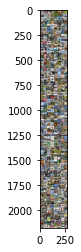

truck   dog horse truck


In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# vis.images(images/2 + 0.5)

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 모델 설정

In [14]:
import torchvision.models.vgg as vgg

cfg = [32,32,'M', 64,64,128,128,128,'M',256,256,256,512,512,512,'M'] #13 + 3 =vgg16

In [15]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        
        super(VGG, self).__init__()
        
        self.features = features
        
        #self.avgpool = nn.AdaptiveAvgPool2d((7, 7)) 
        # 내 이미지가 7,7 보다 크면 관계없는데 작은 경우에는 쓰지 않는 것이 좋다. 따라서 사용하지 않음
        
        self.classifier = nn.Sequential(
            
            nn.Linear(512 * 4 * 4, 4096), # 2^12
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, num_classes),
        )
        
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        # x = self.avgpool(x) # 제외하고 진행
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [16]:
vgg16= VGG(vgg.make_layers(cfg),10,True).to(device)

a=torch.Tensor(1,3,32,32).to(device)
out = vgg16(a)
print(out)

tensor([[ 0.0001,  0.0041, -0.0061,  0.0101,  0.0180,  0.0132, -0.0014,  0.0009,
          0.0088, -0.0052]], grad_fn=<AddmmBackward>)


### train

In [19]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(vgg16.parameters(), lr = 0.005, momentum=0.9)

# learning rate scheduler : lr을 약간씩 감소시켜 정밀한 학습을 돕는다
# step_size 만큼 할 때마다 learning rate * gamma 로 lr 업데이트
lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

In [20]:
print(len(trainloader))
epochs = 50

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    lr_sche.step()
    
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        if i % 30 == 29:    # print every 30 mini-batches
#             loss_tracker(loss_plt, 
#                          torch.Tensor([running_loss/30]), 
#                          torch.Tensor([i + epoch*len(trainloader) ]))
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
        

print('Finished Training')

98


C:\Users\won\anaconda3\envs\cpu_env\lib\site-packages\torch\optim\lr_scheduler.py:118: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


[1,    30] loss: 2.302
[1,    60] loss: 2.299
[1,    90] loss: 2.286
[2,    30] loss: 2.210
[2,    60] loss: 2.136
[2,    90] loss: 2.077
[3,    30] loss: 1.994
[3,    60] loss: 1.898
[3,    90] loss: 1.815
[4,    30] loss: 1.722
[4,    60] loss: 1.675
[4,    90] loss: 1.619
[5,    30] loss: 1.567
[5,    60] loss: 1.524
[5,    90] loss: 1.511
[6,    30] loss: 1.494
[6,    60] loss: 1.445
[6,    90] loss: 1.419
[7,    30] loss: 1.395
[7,    60] loss: 1.376
[7,    90] loss: 1.355
[8,    30] loss: 1.307
[8,    60] loss: 1.285
[8,    90] loss: 1.241
[9,    30] loss: 1.212
[9,    60] loss: 1.194
[9,    90] loss: 1.175
[10,    30] loss: 1.120
[10,    60] loss: 1.107
[10,    90] loss: 1.101
[11,    30] loss: 1.080
[11,    60] loss: 1.081
[11,    90] loss: 1.028
[12,    30] loss: 1.012
[12,    60] loss: 1.009
[12,    90] loss: 0.989
[13,    30] loss: 0.977
[13,    60] loss: 0.949
[13,    90] loss: 0.949
[14,    30] loss: 0.901
[14,    60] loss: 0.904
[14,    90] loss: 0.901
[15,    30] loss: 0

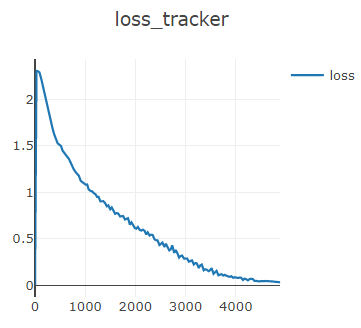

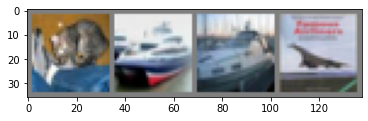

GroundTruth:    cat  ship  ship plane


In [21]:
dataiter = iter(testloader) # 다음 요소 출력
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

### predict

In [22]:
outputs = vgg16(images.to(device))

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [23]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg16(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 76 %


# Advanced CNN_ResNet

실제값과 예측값의 오차만큼만 학습

잔차를 최소로 해주는 것

VGG19의 구조 + 컨볼루션 층들을 추가하여 깊게 + shortcut들을 추가
    - shortcut : 중간을 뛰어넘어 전달하는 shortcut 추가된 것
    - shortcut 장점 : 연산 간단, gradient 직접 전달하여 vanishing, exploding 문제 해결

복잡도를 줄이기 위해 max-pooling, hidden fc, dropout 등을 사용하지 않음


CNN의 경우 앞쪽의 feature가 뒤쪽으로 영향이 직접 전달되지 않고, 중간을 거쳐 전달되므로 학습 과정이 크게 변화한다. 여기에 shortcut을 추가하면 이전으로부터 얼마나 변하는지만 계산하는 문제로 변화한다.

## ResNet_basic

### ResNet 다운로드

In [24]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}

### 모델 설정

In [25]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

#### BasicBlock

In [26]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        
        # bias 더하기 위해서 크기 맞춰줌
        self.downsample = downsample
        
        self.stride = stride

    def forward(self, x):

        identity = x

        out = self.conv1(x) # 3x3 stride = 2
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out) # 3x3 stride = 1
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        
        out += identity
        out = self.relu(out)

        return out
 

##### downsample을 사용하는 이유

만약, x.shape = 3 x 64 x 64일 경우에


identity = 3 x 64 x 64

--------

(3x3 stride = 2)

out = self.conv1(x) # out.shape = 3 x 32 x 32

out = self.bn1(out) 

out = self.relu(out) # out.shape = 3 x 32 x 32

--------

(3x3 stride = 1)

out = self.conv2(out) # out.shape = 3 x 32 x 32

out = self.bn2(out) # out.shape = 3 x 32 x 32

--------

여기에서 out과 identity가 덧셈이 불가능한 상태이기 때문에
이를 해결하기 위해 downsample을 사용한다.

#### Bottleneck Block

In [27]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        
        self.conv1 = conv1x1(inplanes, planes) #conv1x1(64,64)
        self.bn1 = nn.BatchNorm2d(planes)
        
        self.conv2 = conv3x3(planes, planes, stride)#conv3x3(64,64)
        self.bn2 = nn.BatchNorm2d(planes)
        
        self.conv3 = conv1x1(planes, planes * self.expansion) #conv1x1(64,256)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x) # 1x1 stride = 1
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out) # 3x3 stride = stride 
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out) # 1x1 stride = 1
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

#### ResNet

In [28]:
class ResNet(nn.Module):
    # model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs) #resnet 50 
    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__()
        
        ## make_layers에 사용하는 값
        self.inplanes = 64
               
        # input = 64 x 224 x 224 
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # output = self.conv1(inputs)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        # output.shpae = 64 x 112 x 112 ( input + 2 * padding - kernel_size + 1 ) / 2
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # output.shape =  64 X 56 X 56
        
        self.layer1 = self._make_layer(block, 64, layers[0]) # 3
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2) # 4
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2) # 5
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2) # 6
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        
        # range 초기화
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        # 실행 하면 모델의 성능이 0.2 ~ 0.3 % 정도 향상된다.
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)
    
    
    
    # self.layer1 = self._make_layer(Bottleneck, 64, 3)
    # self.layer2 = self._make_layer(Bottleneck, 128, 4, stride=2)
    def _make_layer(self, block, planes, blocks, stride=1):
        
        downsample = None
        
        # self.inplanes != planes * block.expansion 
        # 64 != 64 * 4
        if stride != 1 or self.inplanes != planes * block.expansion: 
            
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride), #conv1x1(64, 256, 1) #conv1x1(256, 512, 2)  
                nn.BatchNorm2d(planes * block.expansion), # batchnrom2d(256) # batchnrom2d(512)
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        # layers.append(Bottleneck(64, 64, 1, downsample))
        
        self.inplanes = planes * block.expansion #self.inplanes = 64 * 4 = 256 # self.inplanes = 128 * 4
        
        
        for _ in range(1, blocks): 
        # for _ in range(1, 3) # layer1
        # for _ in range(1, 4) # layer2
            layers.append(block(self.inplanes, planes)) # * 2 # * 3

        return nn.Sequential(*layers)
    
    # self.layer1 = [
        # bottleneck(64, 64, 1, downsample)
        # bottleneck(256, 64)
        # bottleneck(256, 256)
    # ]
    
    # self.layer2 = [
        # bottleneck(256,128, 2, downsample)
        # bottleneck(512, 128)
        # bottleneck(512, 128)
        # bottleneck(512, 128)
    # ]    

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [29]:
# 18은 basic block
def resnet18(pretrained=False, **kwargs):
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs) #=> 2*(2+2+2+2) +1(conv1) +1(fc)  = 16 +2 =resnet 18
    return model

# 각 블락을 2개씩 만들기 때문에 2 * ( 2 + 2 + 2 + 2)
# 맨앞에 conv 1 
# 맨뒤에 fc

# 50은 bottleneck
def resnet50(pretrained=False, **kwargs):
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs) #=> 3*(3+4+6+3) +(conv1) +1(fc) = 48 +2 = 50
    return model

# 1x1, 3x3, 1x1 의 총 세개가 있으므로 3 * ( 3 + 4 + 6 + 3) 
# conv1
# fc 

def resnet152(pretrained=False, **kwargs):
    model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs) # 3*(3+8+36+3) +2 = 150+2 = resnet152    
    return mode

res = resnet18()
res

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## ResNet_cifar10

In [30]:
import torch
import torch.nn as nn

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import torchvision.models.resnet as resnet

### Data

In [31]:
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, download=True, transform=transform)
print(trainset.data.shape)


train_data_mean = trainset.data.mean( axis=(0,1,2) ) # 각 축의 평균
train_data_std = trainset.data.std( axis=(0,1,2) ) # 각 축의 표준편차
print(train_data_mean)
print(train_data_std)

# normalize하기 위해서
train_data_mean = train_data_mean / 255
train_data_std = train_data_std / 255
print(train_data_mean)
print(train_data_std)

Files already downloaded and verified
(50000, 32, 32, 3)
[125.30691805 122.95039414 113.86538318]
[62.99321928 62.08870764 66.70489964]
[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


In [32]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4), # 이미지를 랜덤으로 잘라서 사이즈 크기로 출력
    transforms.ToTensor(), # 0 ~ 1 사이 값
    transforms.Normalize(train_data_mean, train_data_std) # 데이터의 중심을 원점으로 하여 정규화(-1 ~ 1)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_data_mean, train_data_std)
])


trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=0)


testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform_test)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=0)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [33]:
# visdom으로 그려보기
#loss_plt = vis.line(Y=torch.Tensor(1).zero_(),opts=dict(title='loss_tracker', legend=['loss'], showlegend=True))
# acc_plt = vis.line(Y=torch.Tensor(1).zero_(),opts=dict(title='Accuracy', legend=['Acc'], showlegend=True))

### 모델 설정

In [34]:
conv1x1=resnet.conv1x1
Bottleneck = resnet.Bottleneck
BasicBlock= resnet.BasicBlock

In [35]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 16 # 사이즈가 작은 편이므로 작게 만든다.
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        #self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1) # 사이즈가 작은 편이므로 진행하지 않음
         
        
        self.layer1 = self._make_layer(block, 16, layers[0], stride=1)
        self.layer2 = self._make_layer(block, 32, layers[1], stride=1)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2) # stride 변화 
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        #x.shape =[1, 16, 32,32]
        x = self.bn1(x)
        x = self.relu(x)
        #x = self.maxpool(x)

        x = self.layer1(x)
        #x.shape =[1, 128, 32,32]
        x = self.layer2(x)
        #x.shape =[1, 256, 32,32]
        x = self.layer3(x)
        #x.shape =[1, 512, 16,16]
        x = self.layer4(x)
        #x.shape =[1, 1024, 8,8]
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [36]:
resnet50 = ResNet(resnet.Bottleneck, [3, 4, 6, 3], 10, True).to(device) 
#1(conv1) + 9(layer1) + 12(layer2) + 18(layer3) + 9(layer4) +1(fc)= ResNet50
resnet50

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

### train

In [37]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(resnet50.parameters(), lr = 0.1, momentum = 0.9, weight_decay=5e-4)
lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

In [38]:
def acc_check(net, test_set, epoch, save=1):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_set:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    acc = (100 * correct / total)
    print('Accuracy of the network on the 10000 test images: %d %%' % acc)
    if save:
        torch.save(net.state_dict(), "./model/model_epoch_{}_acc_{}.pth".format(epoch, int(acc)))
    return acc

In [41]:
print(len(trainloader))
epochs = 20

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 30 mini-batches
            # value_tracker(loss_plt, torch.Tensor([running_loss/30]), torch.Tensor([i + epoch*len(trainloader) ]))
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
    
    #Check Accuracy
    acc = acc_check(resnet50, testloader, epoch, save=1)
    # value_tracker(acc_plt, torch.Tensor([acc]), torch.Tensor([epoch]))
    

print('Finished Training')

# 84 % 에서 성능이 개선되지 않아 학습을 임의로 중단함
# 23 batch 까지 약 15시간

196
[1,    30] loss: 1.786
[1,    60] loss: 1.696
[1,    90] loss: 1.617
[1,   120] loss: 1.571
[1,   150] loss: 1.522
[1,   180] loss: 1.476
Accuracy of the network on the 10000 test images: 47 %
[2,    30] loss: 1.392
[2,    60] loss: 1.323
[2,    90] loss: 1.249
[2,   120] loss: 1.216
[2,   150] loss: 1.183
[2,   180] loss: 1.166
Accuracy of the network on the 10000 test images: 52 %
[3,    30] loss: 1.106
[3,    60] loss: 1.069
[3,    90] loss: 1.051
[3,   120] loss: 1.000
[3,   150] loss: 0.985
[3,   180] loss: 0.971
Accuracy of the network on the 10000 test images: 61 %
[4,    30] loss: 0.954
[4,    60] loss: 0.931
[4,    90] loss: 0.905
[4,   120] loss: 0.883
[4,   150] loss: 0.884
[4,   180] loss: 0.860
Accuracy of the network on the 10000 test images: 66 %
[5,    30] loss: 0.840
[5,    60] loss: 0.807
[5,    90] loss: 0.776
[5,   120] loss: 0.799
[5,   150] loss: 0.764
[5,   180] loss: 0.791
Accuracy of the network on the 10000 test images: 68 %
[6,    30] loss: 0.752
[6,    6

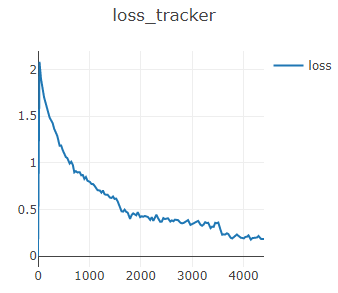
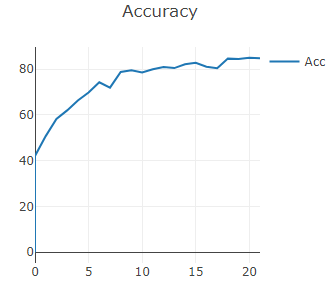

In [42]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = resnet50(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 84 %


# Advanced Cnn_etc

Classification
- object detection : 사진 안에 객체가 어디에 있는지, 무엇인지 찾아낸다
- object tracking : 이전, 현재 frame의 객체를 찾아냈다면 전의 객체가 다음 frame에서 어떤 객체인지 labeling 하며 tracking 
- segmentation : 배경과 객체가 분할된다

Classification : DenseNet, SENet, MobileNet, SqueezeNet, AutoML(NAS, NASNet)

    - MobileNet, SqueezeNet : 크기를 압축해서 모바일에서 사용할 수 있도록
    - Neural Architecture Search with Reinforcement learning
    
Detection : Latest Object Detection 구글에 검색해보기

Track : MDNet, GOTURN, CFNet, ROLO, Tracking the Untrackable

Segmentation : FCN, U-Net, Mask RCNN

* Classification
* Detection
* Tracking => SiamessCNN(Object-ReID)
* Segmentaion
* Image Captioning : RNN 이후 학습
* Super Resolution : 저해상도 -> 고해상도
* Generative Model(AutoEncoder, GAN) : 생성 모델
* OpenPose : 사람의 관절 구조를 파악할 수 있음